In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,SimpleRNN
from tensorflow.keras.optimizers import Adam,SGD

## Data

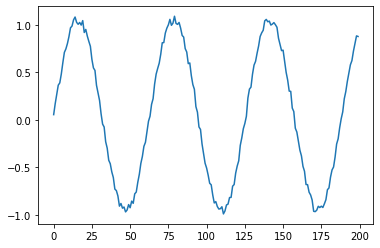

In [107]:
sinfunc = np.sin(np.arange(200)*0.1) + np.random.rand(200) * 0.1
plt.plot(sinfunc)

In [108]:
T = 10
D = 1
X = []
Y = []

for t in range(len(sinfunc)-T):
  x = sinfunc[t:t+T]
  X.append(x)
  y = sinfunc[t+T]
  Y.append(y)

X = np.array(X).reshape(-1,T,1)
Y = np.array(Y)
N = X.shape[0]
print(f'X shape: {X.shape}, Y shape: {Y.shape}')

X shape: (190, 10, 1), Y shape: (190,)


## Model

In [0]:
i = Input(shape=(T,1))
x = SimpleRNN(5,activation=None)(i)
x = Dense(1)(x)

model = Model(i,x)

model.compile(loss='mse',
              optimizer=Adam(lr=0.1))

In [110]:
model.fit(X[:-N//2],Y[:-N//2],
          epochs=80,
          validation_data=(X[-N//2:],Y[-N//2:]))

Epoch 1/80
3/3 [==============================] - 0s 51ms/step - loss: 1.6432 - val_loss: 0.5271
Epoch 2/80
3/3 [==============================] - 0s 13ms/step - loss: 0.5193 - val_loss: 0.4935
Epoch 3/80
3/3 [==============================] - 0s 14ms/step - loss: 0.4217 - val_loss: 0.2760
Epoch 4/80
3/3 [==============================] - 0s 14ms/step - loss: 0.2438 - val_loss: 0.2202
Epoch 5/80
3/3 [==============================] - 0s 13ms/step - loss: 0.1602 - val_loss: 0.0943
Epoch 6/80
3/3 [==============================] - 0s 16ms/step - loss: 0.0697 - val_loss: 0.0303
Epoch 7/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0221 - val_loss: 0.0069
Epoch 8/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0150 - val_loss: 0.0536
Epoch 9/80
3/3 [==============================] - 0s 15ms/step - loss: 0.0431 - val_loss: 0.0340
Epoch 10/80
3/3 [==============================] - 0s 16ms/step - loss: 0.0305 - val_loss: 0.0104
Epoch 11/80
3/3 [============

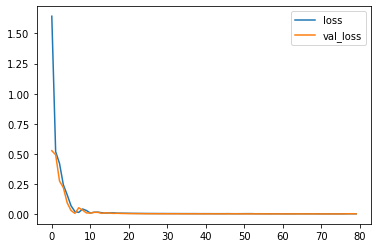

In [111]:
losses = pd.DataFrame(model.history.history)
plt.plot(losses['loss'],label='loss')
plt.plot(losses['val_loss'],label='val_loss')
plt.legend()
plt.show()

## Forecasting

In [0]:
validation_data = Y[-N//2:]
validation_pred = []
x_last=X[-N//2]

while len(validation_pred) < len(validation_data):
  pred = model.predict(x_last.reshape(1,-1,1))[0,0]
  validation_pred.append(pred)
  x_last = np.roll(x_last,-1)
  x_last[-1] = pred

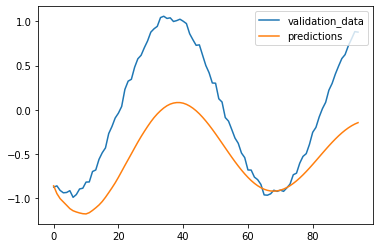

In [113]:
plt.plot(validation_data,label='validation_data')
plt.plot(validation_pred,label='predictions')
plt.legend()
plt.show()